Implementing K-means with scikit learn and Tensorflow for the California Housing Price dataset, which will provide the housing price in California region. I found this dataset from Kaggle https://www.kaggle.com/camnugent/california-housing-prices. This data set has 10 features like housing median age, population, households and others. I choose three feautres out of 10 that is latitude, longitude and median_income. Median_income feature will represents the number of clusters, for this problem statement i took 6 clusters to repersene the data.

**Kmeans scikit learn**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

df = pd.read_csv("./assignment_1_dataset/housing.csv")
df.info()
features = ["median_income", "latitude", "longitude"]
X = df.loc[:, features]
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15210 entries, 0 to 15209
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15210 non-null  float64
 1   latitude            15210 non-null  float64
 2   housing_median_age  15210 non-null  float64
 3   total_rooms         15210 non-null  float64
 4   total_bedrooms      15062 non-null  float64
 5   population          15210 non-null  float64
 6   households          15210 non-null  float64
 7   median_income       15210 non-null  float64
 8   median_house_value  15210 non-null  float64
 9   ocean_proximity     15209 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


,median_income,latitude,longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [ ]:
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

#print(kmeans)

,median_income,latitude,longitude,Cluster
0,8.3252,37.88,-122.23,4
1,8.3014,37.86,-122.22,4
2,7.2574,37.85,-122.24,4
3,5.6431,37.85,-122.25,4
4,3.8462,37.85,-122.25,1


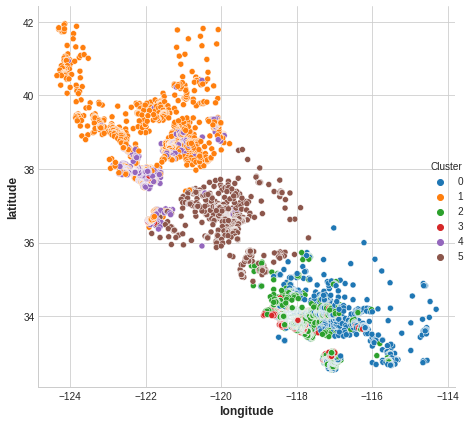

In [ ]:


sns.relplot(
    x="longitude", y="latitude", hue="Cluster", data=X, height=6,
);


Above graph showing the placement of clusters on the basis of longitude and latitude. Clusters are representing the medain_income of that area. Higher the latitude and longitude shows the higher prices for that region. As shown in figure when the logitutude is getting higher i.e -114 or moving closer to west coast then number of houses getting less, this shows the area is costly and people there have high median_income there. Business use case can be Zillow price estimation.

**Kmeans tensorflow**

Same approach has been followed with tensorflow over same dataset.

In [ ]:
import numpy as np
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

X_TF = df.loc[:, features]
X_TF.head()


,median_income,latitude,longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [ ]:

def input_fn():
  return tf.compat.v1.train.limit_epochs(
      tf.convert_to_tensor(X_TF, dtype=tf.float32), num_epochs=1)

num_clusters = 6
kmeans = tf.compat.v1.estimator.experimental.KMeans(
    num_clusters=num_clusters, use_mini_batch=False)

# train
num_iterations = 30
previous_centers = None
for _ in range(num_iterations):
  kmeans.train(input_fn)
  cluster_centers = kmeans.cluster_centers()
  previous_centers = cluster_centers
print('cluster centers:', cluster_centers)
# map the input points to their clusters
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
X_TF['cluster'] = cluster_indices


cluster centers: [[   4.258381    33.9354    -117.9882   ]
 [   2.6553311   33.061268  -116.82326  ]
 [  11.101687    34.728188  -118.94513  ]
 [   6.5773883   33.854298  -117.9712   ]
 [   3.4786186   38.105656  -121.586334 ]
 [   2.403659    34.206463  -118.199455 ]]


In [ ]:
X_TF.head()
#print(X_TF['clusters'])

,median_income,latitude,longitude,cluster
0,8.3252,37.88,-122.23,4
1,8.3014,37.86,-122.22,4
2,7.2574,37.85,-122.24,4
3,5.6431,37.85,-122.25,4
4,3.8462,37.85,-122.25,4


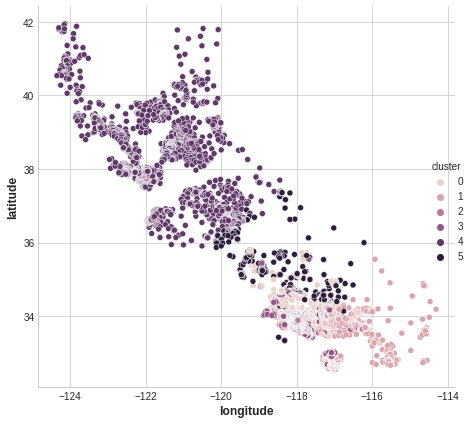

In [ ]:
sns.relplot(
    x="longitude", y="latitude", hue="cluster", data=X_TF, height=6,
);